Standard import statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import csv
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import make_scorer
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV
%matplotlib inline

Load the Dataset

In [2]:
datasetFile = 'housing_data.csv'
datasetName = 'Boston Housing Dataset'

reader = csv.reader(open(datasetFile, 'r'))
readData = pd.DataFrame(list(reader)[0:])

#print(readData)

readData.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV" ]
readData = readData.astype(float)

#print(readData['MEDV'])

Linear Regression (Calculating Average RMSE through a loop)

In [3]:
X = readData.drop('MEDV', axis=1).values
Y = readData['MEDV'].values

testrmse_list = []
trainrmse_list = []
kf = KFold(n_splits=10, random_state=None, shuffle=False)
#print(kf.get_n_splits(X))

for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    Y_train, Y_test = Y[trainset], Y[testset]
    lm = LinearRegression(n_jobs=-1)
    lm.fit(X_train, Y_train)
    y_train_predict = lm.predict(X_train)
    y_test_predict = lm.predict(X_test)
    train_rmse = mean_squared_error(Y_train, y_train_predict)
    test_rmse = mean_squared_error(Y_test, y_test_predict)
    #print('RMSE is {}'.format(rmse))
    trainrmse_list.append(train_rmse)
    testrmse_list.append(test_rmse)

sum = 0
for i in trainrmse_list:
    sum = sum + i
avg_rmse = np.sqrt(sum/len(trainrmse_list))
print("The average Train RMSE is: ",avg_rmse)  
    
sum = 0
for i in testrmse_list:
    sum = sum + i
avg_rmse = np.sqrt(sum/len(testrmse_list))
print("The average Test RMSE is: ",avg_rmse)   

The average Train RMSE is:  4.625947731774086
The average Test RMSE is:  5.8911166975816185


Linear Regression (Calculating Average RMSE using inbuilt function)

In [4]:
scorer = make_scorer(mean_squared_error)
scores = cross_val_score(lm, X, Y, cv=10, scoring=scorer)
predicted = cross_val_predict(lm, X, Y, cv=10)
print('Cross-validated scores:', scores)

sum = 0
for i in scores:
    sum = sum + i
avg_score = np.sqrt(sum/len(scores))

print("The average RMSE is:",avg_score) 

Cross-validated scores: [  9.28694671  14.15128316  14.07360615  35.20692433  31.88511666
  19.83587796   9.94726918 168.37537954  33.32974507  10.96041068]
The average RMSE is: 5.8911166975816185


Significance of different variables in the dataset

In [5]:
Estimator = sm.OLS(Y,sm.add_constant(X))
est2 = Estimator.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        23:12:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

High p value has a low coefficient which means low significance.
From the above table, we see that the 3rd and 7th value are insignifcant.
This means that column INDUS and AGE are insignificant here

Actual values vs Fitted values

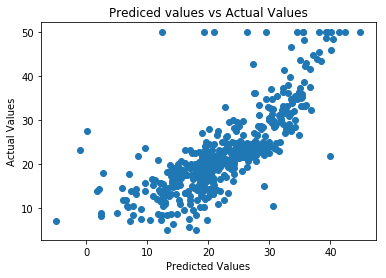

In [6]:
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title('Prediced values vs Actual Values')
plt.scatter(predicted, Y)
plt.show()

Residual values vs Actual values

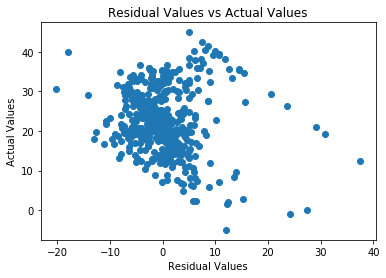

In [7]:
residuals = Y - predicted
plt.xlabel('Residual Values')
plt.ylabel('Actual Values')
plt.title('Residual Values vs Actual Values')
plt.scatter(residuals, predicted)
plt.show()

RIDGE REGULARIZATION

In [8]:
warnings.filterwarnings('ignore')
tuningAlpha = [0.001, 0.005, 0.01, 0.1]
ridge = RidgeCV(alphas=tuningAlpha, cv=10)
ridge.fit(X,Y)
prediction = ridge.predict(X)

print("Ridge Regularization coefficients: \n" + str(ridge.coef_))
print("Best Alpha value for Ridge Regularization : " + str(ridge.alpha_))
print('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(Y, prediction)))

Ridge Regularization coefficients: 
[-1.07473720e-01  4.65716366e-02  1.59989982e-02  2.67001859e+00
 -1.66846452e+01  3.81823322e+00 -2.69060598e-04 -1.45962557e+00
  3.03515266e-01 -1.24205910e-02 -9.40758541e-01  9.36807461e-03
 -5.25966203e-01]
Best Alpha value for Ridge Regularization : 0.1
Best RMSE for corresponding Alpha = 4.679573505950084


LASSO REGULARIZATION

In [9]:
tuningAlpha = [0.001, 0.005, 0.01]
lasso = LassoCV(alphas=tuningAlpha, cv=10)
lasso.fit(X,Y)
prediction = lasso.predict(X)

print("Lasso Regularization coefficients: \n" + str(lasso.coef_))
print("Best Alpha value for Lasso Regularization : " + str(lasso.alpha_))
print('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(Y, prediction)))

Lasso Regularization coefficients: 
[-1.06228354e-01  4.68603033e-02  6.47427472e-03  2.50419017e+00
 -1.43944776e+01  3.81418583e+00 -1.81830336e-03 -1.42215548e+00
  2.98525812e-01 -1.26273172e-02 -9.16368723e-01  9.48546597e-03
 -5.30481493e-01]
Best Alpha value for Lasso Regularization : 0.01
Best RMSE for corresponding Alpha = 4.683094652065242


ELASTICNET REGULARIZATION

In [10]:
tuningAlpha = [0.001, 0.005, 0.01]
ENet = ElasticNetCV(alphas=tuningAlpha, l1_ratio = 0.25, fit_intercept = True, cv =10)
ENet.fit(X,Y)
prediction = ENet.predict(X)

print("Best Alpha value for ElasticNet Regularization :" + str(ENet.alpha_))
print("ElasticNet Regularization coefficients: \n" + str(ENet.coef_))
print('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(Y, prediction)))
print()

ENet = ElasticNetCV(alphas=tuningAlpha, l1_ratio = 0.5, fit_intercept = True, cv =10)
ENet.fit(X,Y)
prediction = ENet.predict(X)

print("Best Alpha value for ElasticNet Regularization :" + str(ENet.alpha_))
print("ElasticNet Regularization coefficients: \n" + str(ENet.coef_))
print('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(Y, prediction)))
print()

ENet = ElasticNetCV(alphas=tuningAlpha, l1_ratio = 0.75, fit_intercept = True, cv =10)
ENet.fit(X,Y)
prediction = ENet.predict(X)

print("Best Alpha value for ElasticNet Regularization :" + str(ENet.alpha_))
print("ElasticNet Regularization coefficients: \n" + str(ENet.coef_))
print('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(Y, prediction)))
print()

Best Alpha value for ElasticNet Regularization :0.01
ElasticNet Regularization coefficients: 
[-0.10196393  0.04855951 -0.03271051  2.27471864 -4.89021332  3.83060771
 -0.00987937 -1.28485     0.27938796 -0.0135273  -0.81582955  0.00996088
 -0.54540011]
Best RMSE for corresponding Alpha = 4.733921787696015

Best Alpha value for ElasticNet Regularization :0.01
ElasticNet Regularization coefficients: 
[-0.10236961  0.04826146 -0.02743408  2.33082345 -6.09362738  3.84546913
 -0.00899451 -1.30115187  0.28110806 -0.01339    -0.82728988  0.00990764
 -0.54230171]
Best RMSE for corresponding Alpha = 4.724067684420328

Best Alpha value for ElasticNet Regularization :0.01
ElasticNet Regularization coefficients: 
[-1.03323522e-01  4.78216861e-02 -1.75773150e-02  2.39925993e+00
 -8.38154061e+00  3.84957051e+00 -7.12244198e-03 -1.33340520e+00
  2.85461840e-01 -1.31706491e-02 -8.50916168e-01  9.79695005e-03
 -5.38171727e-01]
Best RMSE for corresponding Alpha = 4.70821821836158

